#1. Data Exploration

##a.Load the datasets & perform EDA4

In [3]:
import pandas as pd

df = pd.read_csv('Titanic_train.csv')  # Assuming Titanic dataset as it's related to survival
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


##b.Examine features and summary

In [6]:
print(df.info())
print(df.describe(include='all'))
print(df.isnull().sum)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
        PassengerId      Pclass                      Name   Sex         Age  \
count    418.000000  418.000000                       418   418  332.000000   
unique          NaN         NaN                       418     2         NaN   
top             NaN         NaN  Peter, Mast

##c.Visualizations

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

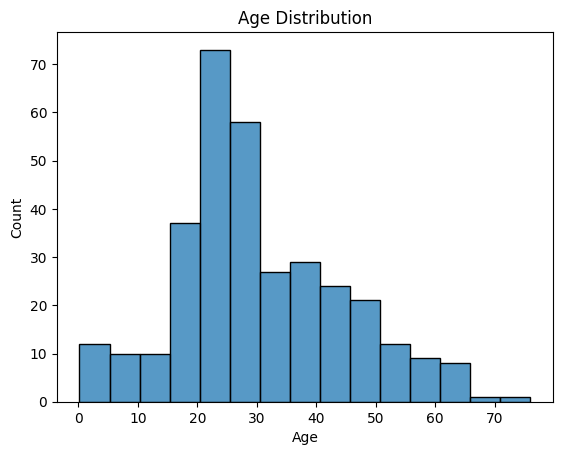

In [8]:
sns.histplot(df['Age'].dropna())
plt.title("Age Distribution")
plt.show()

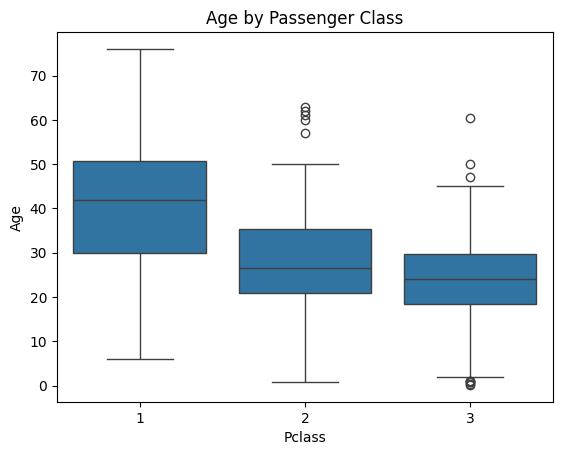

In [9]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Age by Passenger Class")
plt.show()

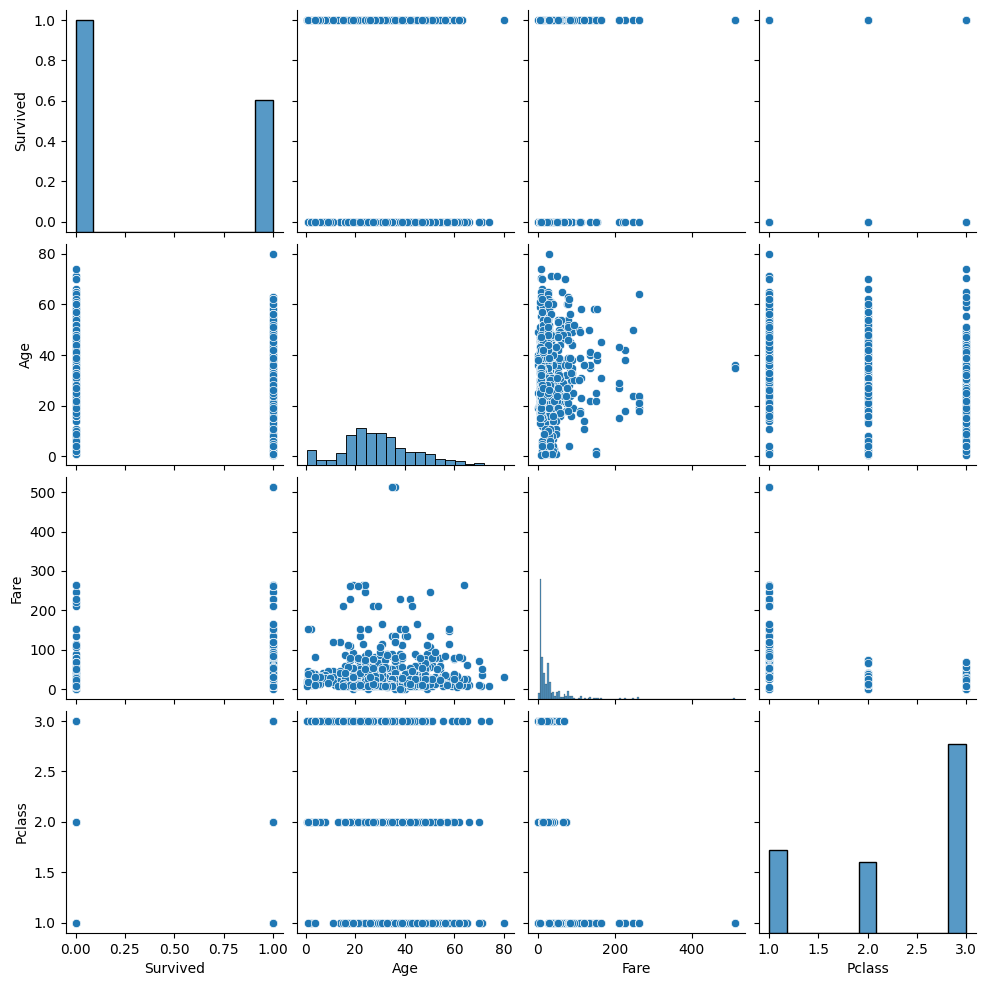

In [16]:
train_df = pd.read_csv('Titanic_train.csv')
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']])2

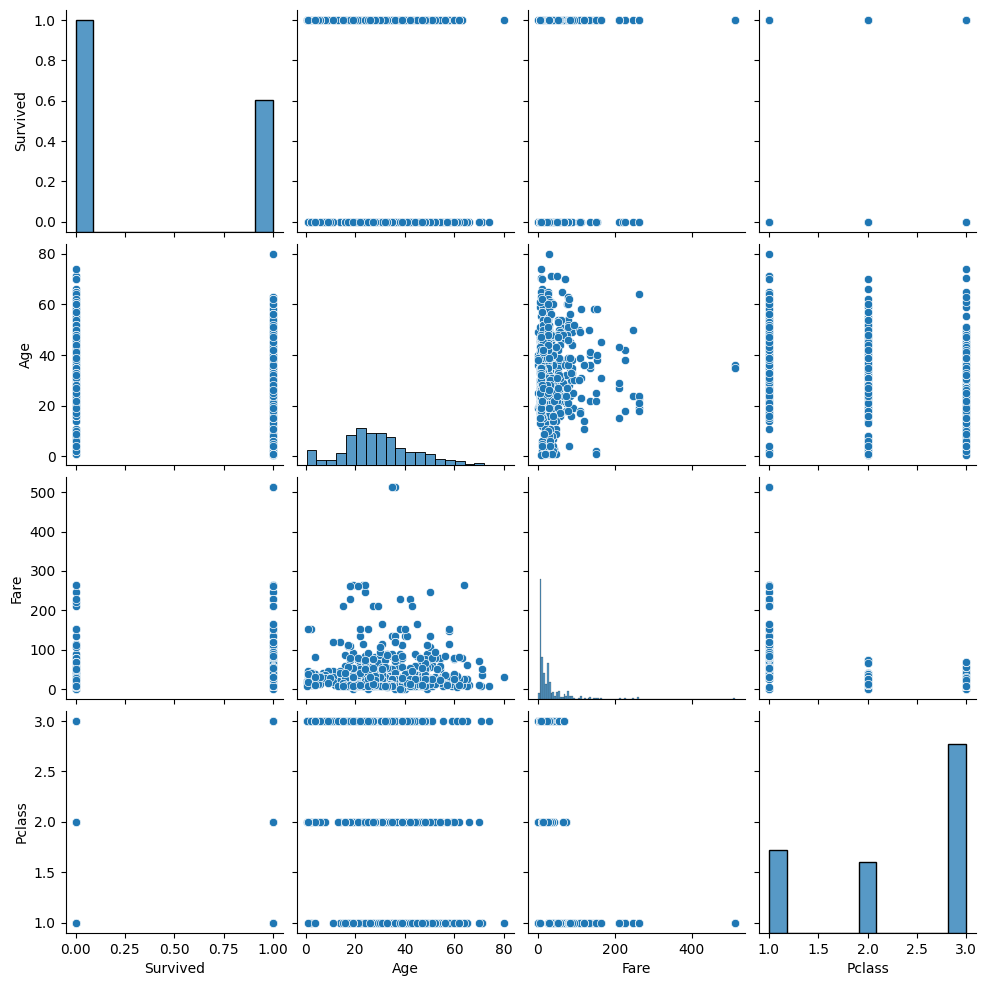

In [17]:
test_df = pd.read_csv('Titanic_test.csv')
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass']])

Observations:
Younger passengers in 1st class had higher survival.
Fare and Pclass correlate with survival.
Missing values in Age, Cabin, and Embarked.

#2. Data Preprocessing



In [22]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [19]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


#3. Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Reload the training data to ensure 'Embarked' column is present
train_df = pd.read_csv('Titanic_train.csv')

# Preprocess the training data
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming train_df is already preprocessed from the previous step
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#4. Model Evaluation

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [37]:
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



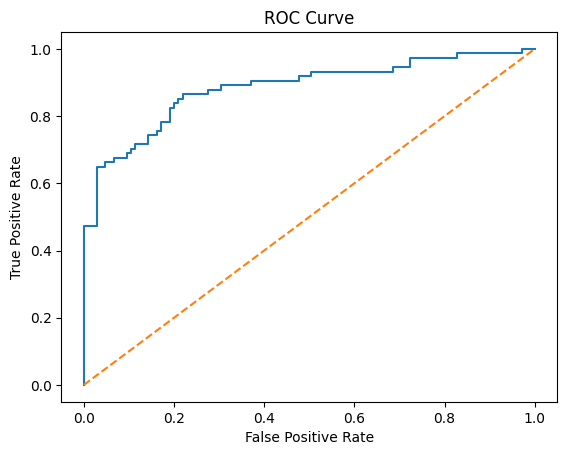

ROC-AUC Score: 0.883011583011583


In [38]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

#5. Interpretation

In [39]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))


      Feature  Coefficient
1         Sex     2.588798
5        Fare     0.002545
2         Age    -0.030624
4       Parch    -0.107816
6  Embarked_Q    -0.121350
3       SibSp    -0.294033
7  Embarked_S    -0.413828
0      Pclass    -0.936793


Positive coefficients (like Sex=1) increase survival probability.
Negative coefficients (like Pclass=3) reduce survival chance.

#6. Deployment with Streamlit

In [42]:
!pip install streamlit

In [45]:
import pickle

# Save the trained model
with open('logistic_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [46]:
import streamlit as st
import pickle

# Make sure to save your trained model as 'logistic_model.pkl' before running this cell
model = pickle.load(open('logistic_model.pkl', 'rb'))

st.title("Titanic Survival Prediction")

2025-07-01 18:16:23.402 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:23.477 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-01 18:16:23.478 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:23.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [47]:
age = st.slider("Age", 1, 80)
fare = st.slider("Fare", 0, 500)
sex = st.selectbox("Sex", ["male", "female"])
pclass = st.selectbox("Pclass", [1, 2, 3])
embarked = st.selectbox("Embarked", ['C', 'Q', 'S'])


2025-07-01 18:16:25.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:25.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:25.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:25.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:25.825 Session state does not function when running a script without `streamlit run`
2025-07-01 18:16:25.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:25.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:25.831 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16

In [48]:
sex = 0 if sex == "male" else 1
embarked_C = 1 if embarked == "C" else 0
embarked_Q = 1 if embarked == "Q" else 0

features = [[pclass, sex, age, fare, embarked_C, embarked_Q]]

if st.button("Predict"):
    result = model.predict(features)
    st.write("Survived" if result[0] == 1 else "Did not survive")

2025-07-01 18:16:28.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:28.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:28.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:28.754 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:28.761 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-01 18:16:28.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


#What is the difference between precision and recall?

Precision
Measures how many of the predicted positive results are actually correct.
Formula:
Precision
=
True Positives
True Positives
+
False Positives
Precision=
True Positives+False Positives
True Positives
​

Focus: Avoiding false positives.
Example: In email spam detection, high precision means that most emails marked as spam are truly spam.


 Recall
Measures how many of the actual positive cases were correctly identified.
Formula:
Recall
=
True Positives
True Positives
+
False Negatives
Recall=
True Positives+False Negatives
True Positives
​

Focus: Capturing all real positives.
Example: In cancer detection, high recall ensures that most actual cancer cases are found, even if some healthy ones are misclassified.


#What is cross-validation? Why is it important?

Cross-validation is a technique used to assess the performance and generalizability of a machine learning model by splitting the dataset into multiple subsets and testing the model on different combinations of training and validation data.

The most common method is K-Fold Cross-Validation:

The data is divided into K equal parts (folds).
The model is trained on K−1 folds and tested on the remaining 1 fold.
This process is repeated K times, each time using a different fold as the test set.
The final performance is the average of all K runs.


Benefit	Description
1. Reduces Overfitting	Ensures model performs well on unseen data by testing on multiple splits.
2. Provides Reliable Metrics	Gives a more accurate estimate of model accuracy than a single train-test split.
3. Maximizes Data Usage	All data gets used for both training and testing across different folds.
4. Helps Model Selection	Useful when comparing multip